In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#e 제거하고 5자리 수 띄우기
pd.options.display.float_format = '{:.5f}'.format

In [3]:
indicators= pd.read_excel('../data/statics/지표.xlsx')

indicators

,시도,시군구,행정구역코드,년도,EQ5D,학사_비율,소득액,실업급여지급자수(년),실업급여지급건수(년),실업급여지급액(년),...,70-74세,75-79세,80-84세,85-89세,90-94세,95-99세,100세이상,경제활동가능인구,인구_실업급여자_비율,경제활동가능인구_실업급여자_비율
0,서울,종로구,11010,2015,0.95000,0.38831,2755607,3443,13435,11931891080,...,6511.50000,4647.00000,2593.50000,1264.50000,481.50000,115.00000,18.50000,112432.00000,0.02132,0.03062
1,서울,종로구,11010,2016,0.96800,0.38831,2737610,3304,12419,11836795910,...,6336.50000,4833.50000,2809.50000,1309.50000,482.50000,127.50000,20.50000,110602.50000,0.02140,0.02987
2,서울,종로구,11010,2017,0.95700,0.38831,2870292,3214,12277,12480610630,...,6187.50000,5251.50000,3027.00000,1401.00000,501.50000,132.00000,24.50000,110189.00000,0.02044,0.02917
3,서울,종로구,11010,2018,0.95200,0.38831,3007628,3265,12960,14710609140,...,6152.00000,5571.50000,3234.00000,1493.50000,546.50000,142.00000,24.50000,109943.50000,0.02067,0.02970
4,서울,중구,11020,2015,0.95200,0.32739,2922120,3034,11835,10491851900,...,5269.00000,3661.00000,2056.00000,1019.50000,364.50000,78.50000,8.00000,92054.00000,0.02361,0.03296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,경기,가평군,31370,2018,0.97000,0.18539,1893631,1270,4938,5586589860,...,3516.00000,3268.00000,2121.00000,1003.50000,337.00000,86.50000,9.50000,41697.50000,0.02118,0.03046
260,경기,양평군,31380,2015,0.95200,0.23208,1571897,1671,6827,6165924380,...,5970.50000,4684.50000,2791.00000,1299.00000,494.00000,114.50000,13.50000,71373.00000,0.01639,0.02341
261,경기,양평군,31380,2016,0.95000,0.23208,1637534,1720,6935,6728977860,...,6135.50000,4844.50000,3119.00000,1427.00000,516.00000,132.50000,12.50000,73185.50000,0.01627,0.02350
262,경기,양평군,31380,2017,0.95300,0.23208,1708265,1833,7505,7765318000,...,6290.00000,5194.00000,3404.50000,1553.00000,540.00000,143.50000,14.00000,74997.50000,0.01676,0.02444


In [4]:
print(indicators.columns)

Index(['시도', '시군구', '행정구역코드', '년도', 'EQ5D', '학사_비율', '소득액', '실업급여지급자수(년)',
       '실업급여지급건수(년)', '실업급여지급액(년)', '인구수', '계', '0-4세', '5-9세', '10-14세',
       '15-19세', '20-24세', '25-29세', '30-34세', '35-39세', '40-44세', '45-49세',
       '50-54세', '55-59세', '60-64세', '65-69세', '70-74세', '75-79세', '80-84세',
       '85-89세', '90-94세', '95-99세', '100세이상', '경제활동가능인구', '인구_실업급여자_비율',
       '경제활동가능인구_실업급여자_비율'],
      dtype='object')


In [5]:
indicators.dtypes

시도                    object
시군구                   object
행정구역코드                 int64
년도                     int64
EQ5D                 float64
학사_비율                float64
소득액                    int64
실업급여지급자수(년)            int64
실업급여지급건수(년)            int64
실업급여지급액(년)             int64
인구수                    int64
계                    float64
0-4세                 float64
5-9세                 float64
10-14세               float64
15-19세               float64
20-24세               float64
25-29세               float64
30-34세               float64
35-39세               float64
40-44세               float64
45-49세               float64
50-54세               float64
55-59세               float64
60-64세               float64
65-69세               float64
70-74세               float64
75-79세               float64
80-84세               float64
85-89세               float64
90-94세               float64
95-99세               float64
100세이상               float64
경제활동가능인구             float64
인구_실업급여자_비율   

## 2015년 PCA 실행

### 대상
* 서울, 경기, 인천 66개 지역
* 2015 ~ 2018년 공통으로 도서관(279개)이 존재하는 57개 지역 <- 재확인 예정, 2019년에 다수 도서관이 건립되었음

### 지표

* 건강: EQ-D
* 학업: 학사_비율
* 경제: 경제활동가능인구_실업급여자_비율, 소득액

In [6]:
# 년도, 지표 선택
indicators = indicators[indicators['년도']==2015]
indicators = indicators[['EQ5D','학사_비율','경제활동가능인구_실업급여자_비율','소득액']]

indicators

,EQ5D,학사_비율,경제활동가능인구_실업급여자_비율,소득액
0,0.95000,0.38831,0.03062,2755607
4,0.95200,0.32739,0.03296,2922120
8,0.95800,0.42527,0.03182,2327359
12,0.96200,0.36584,0.03301,2141397
16,0.94900,0.35151,0.03776,1832328
...,...,...,...,...
244,0.93800,0.13530,0.02899,1849320
248,0.93500,0.16190,0.02533,1804792
252,0.94600,0.13197,0.02921,1630078
256,0.95500,0.18539,0.02875,1668913


공분산
* 공분산은 확률변수 X의 편차(평균으로부터 얼마나 떨어져 있는지)와 확률변수 Y의 편차를 곱한 것의 평균값.
* 공분산은 두 변수 간에 양의 상관관계가 있는지, 음의 상관관계가 있는지 정도 파악 가능
* 확률변수의 단위 크기에 영향을 많이 받음.



In [7]:
# 공분산
indicators.cov()

,EQ5D,학사_비율,경제활동가능인구_실업급여자_비율,소득액
EQ5D,0.00006,0.00033,-0.00000,433.79019
학사_비율,0.00033,0.01151,-0.00005,16957.93674
경제활동가능인구_실업급여자_비율,-0.00000,-0.00005,0.00003,-285.80131
소득액,433.79019,16957.93674,-285.80131,121184126832.50911


상관계수

* 상관계수는 확률변수의 절대적 크기에 영향을 받지 않도록 공분산을 단위화
* 1 또는 -1에 가까울 수록 상관성이 큰 것이고, 0에 가까울 수록 상관성이 작은 것

In [8]:
# 상관 관계
indicators.corr()

,EQ5D,학사_비율,경제활동가능인구_실업급여자_비율,소득액
EQ5D,1.00000,0.40955,-0.04112,0.16693
학사_비율,0.40955,1.00000,-0.09385,0.45405
경제활동가능인구_실업급여자_비율,-0.04112,-0.09385,1.00000,-0.15057
소득액,0.16693,0.45405,-0.15057,1.00000


In [9]:
indicators.columns.tolist()

['EQ5D', '학사_비율', '경제활동가능인구_실업급여자_비율', '소득액']

In [10]:
# 칼럼명 변경

indicators.columns = ['EQ5D','Education', 'Unemployment', 'Income']
indicators

,EQ5D,Education,Unemployment,Income
0,0.95000,0.38831,0.03062,2755607
4,0.95200,0.32739,0.03296,2922120
8,0.95800,0.42527,0.03182,2327359
12,0.96200,0.36584,0.03301,2141397
16,0.94900,0.35151,0.03776,1832328
...,...,...,...,...
244,0.93800,0.13530,0.02899,1849320
248,0.93500,0.16190,0.02533,1804792
252,0.94600,0.13197,0.02921,1630078
256,0.95500,0.18539,0.02875,1668913


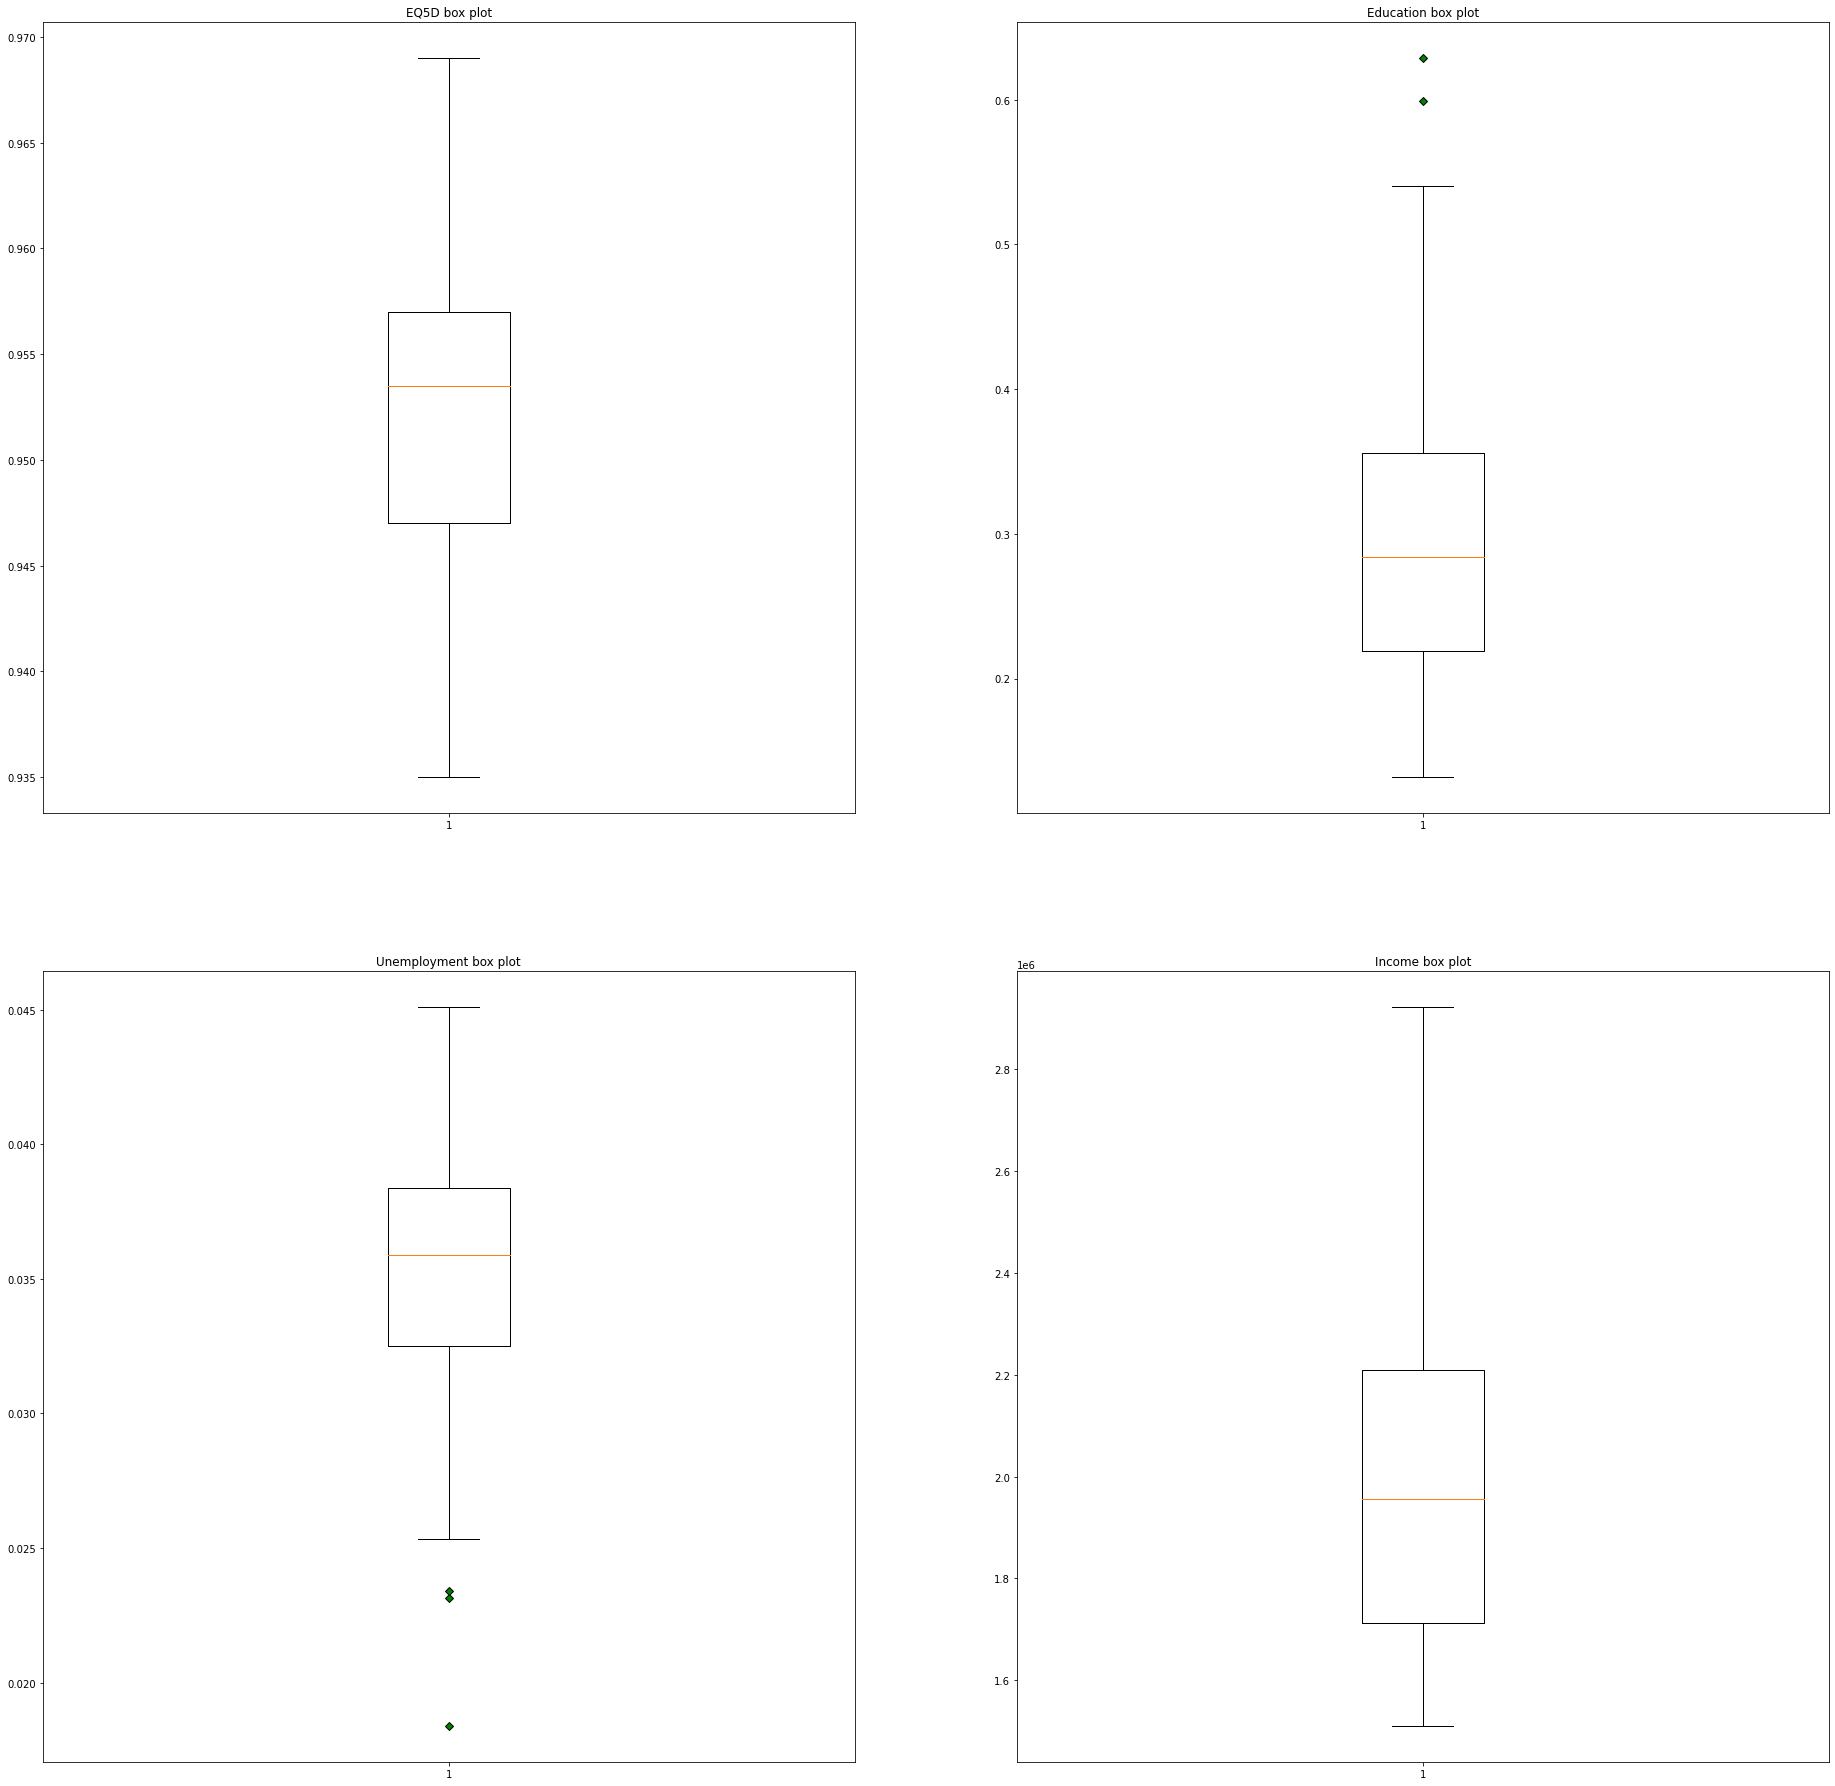

In [11]:
# 시각화

plt.figure(figsize=(32,32))
green_diamond = dict(markerfacecolor='g', marker='D')

for k in range(4):
    
    plt.subplot(2,2,1+k)
    plt.boxplot(indicators[indicators.columns.tolist()[k]], flierprops=green_diamond)
    plt.title("{} box plot".format(indicators.columns.tolist()[k]))
plt.show()

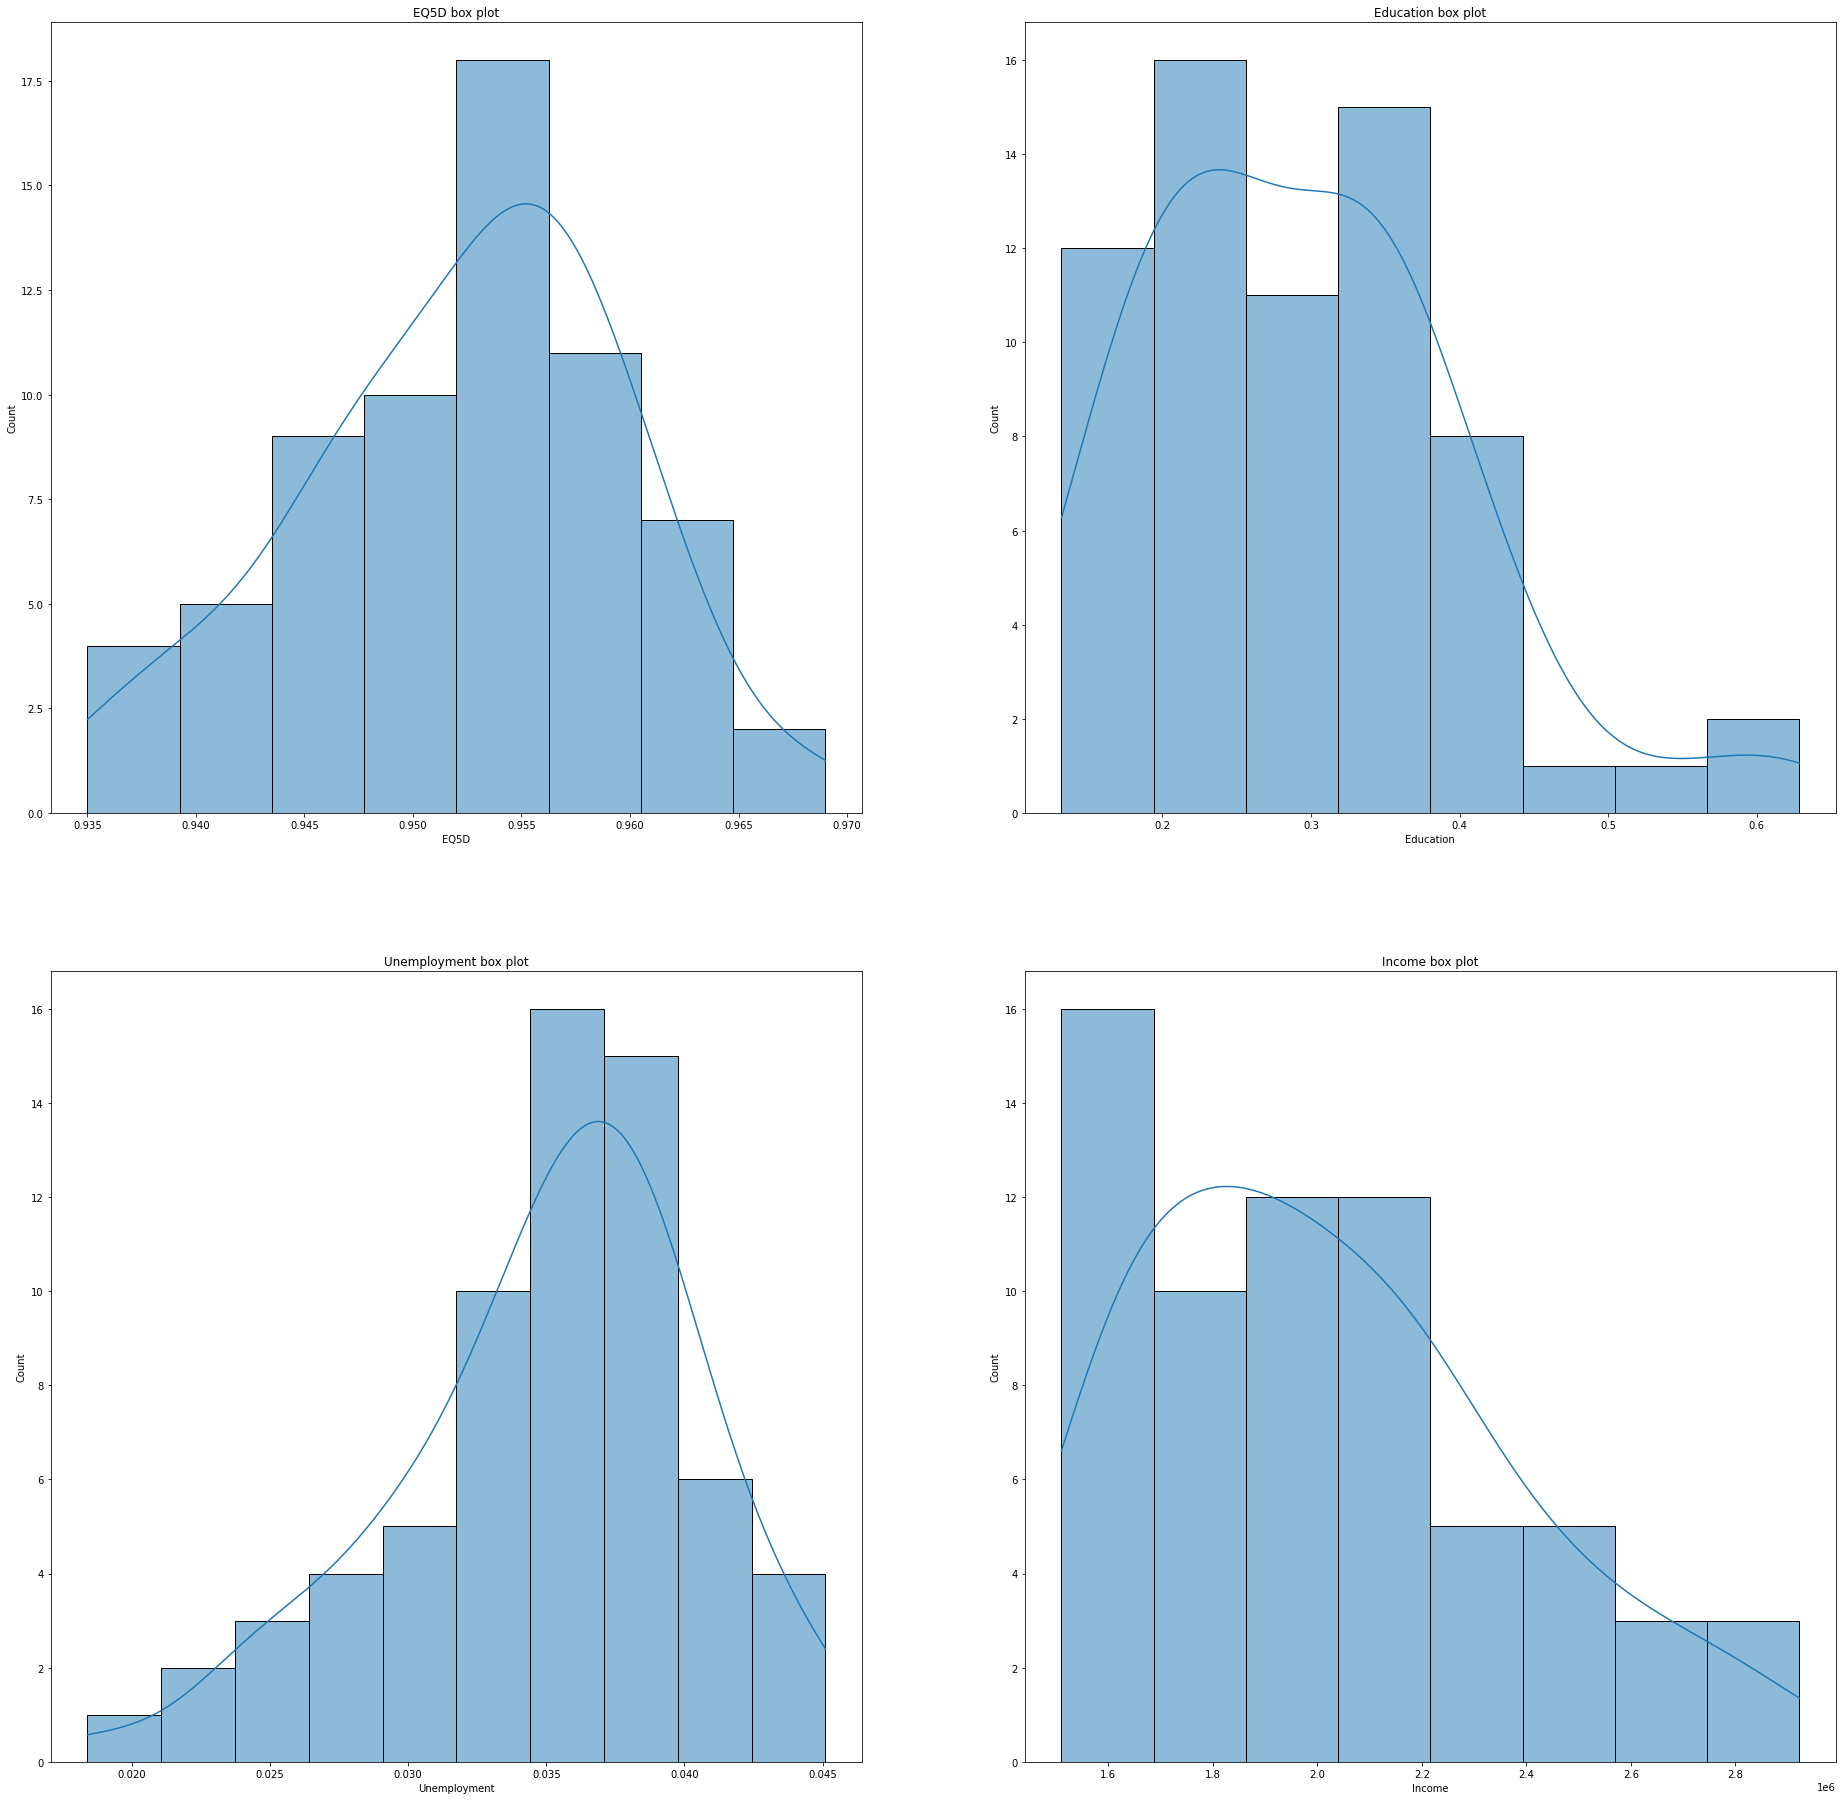

In [12]:
# 시각화

plt.figure(figsize=(32,32))

for k in range(4):
    
    plt.subplot(2,2,1+k)
    sns.histplot(indicators[indicators.columns.tolist()[k]], kde=True)
    plt.title("{} box plot".format(indicators.columns.tolist()[k]))
plt.show()

### PCA

과정
* 1) 분산량이 왜곡을 피하기 위하여 scaling 진행 (참고 사이트 : https://www.researchgate.net/post/Is-it-necessary-to-normalize-data-before-performing-principle-component-analysis)
* 2) PCA 실행

In [13]:
#전체적으로 스케일링을 하여 같은 범위로 하게 만듦

from sklearn.preprocessing import StandardScaler 

transformer = StandardScaler()

x_data = transformer.fit_transform(indicators)

scale_df= pd.DataFrame(x_data,columns=indicators.columns.tolist())
scale_df

,EQ5D,Education,Unemployment,Income
0,-0.30270,0.87934,-0.80827,2.14934
1,-0.03272,0.30711,-0.37658,2.63133
2,0.77720,1.22647,-0.58691,0.90972
3,1.31714,0.66823,-0.36791,0.37143
4,-0.43768,0.53369,0.51008,-0.52321
...,...,...,...,...
61,-1.92254,-1.49708,-1.10959,-0.47402
62,-2.32750,-1.24722,-1.78724,-0.60291
63,-0.84264,-1.52830,-1.06951,-1.10865
64,0.37224,-1.02662,-1.15502,-0.99623


In [14]:
# 스케일링 후 공분산
scale_df.cov()

,EQ5D,Education,Unemployment,Income
EQ5D,1.01538,0.41585,-0.04176,0.16950
Education,0.41585,1.01538,-0.09529,0.46104
Unemployment,-0.04176,-0.09529,1.01538,-0.15288
Income,0.16950,0.46104,-0.15288,1.01538


In [15]:
# 스케일링 후 상관 관계
scale_df.corr()

,EQ5D,Education,Unemployment,Income
EQ5D,1.00000,0.40955,-0.04112,0.16693
Education,0.40955,1.00000,-0.09385,0.45405
Unemployment,-0.04112,-0.09385,1.00000,-0.15057
Income,0.16693,0.45405,-0.15057,1.00000


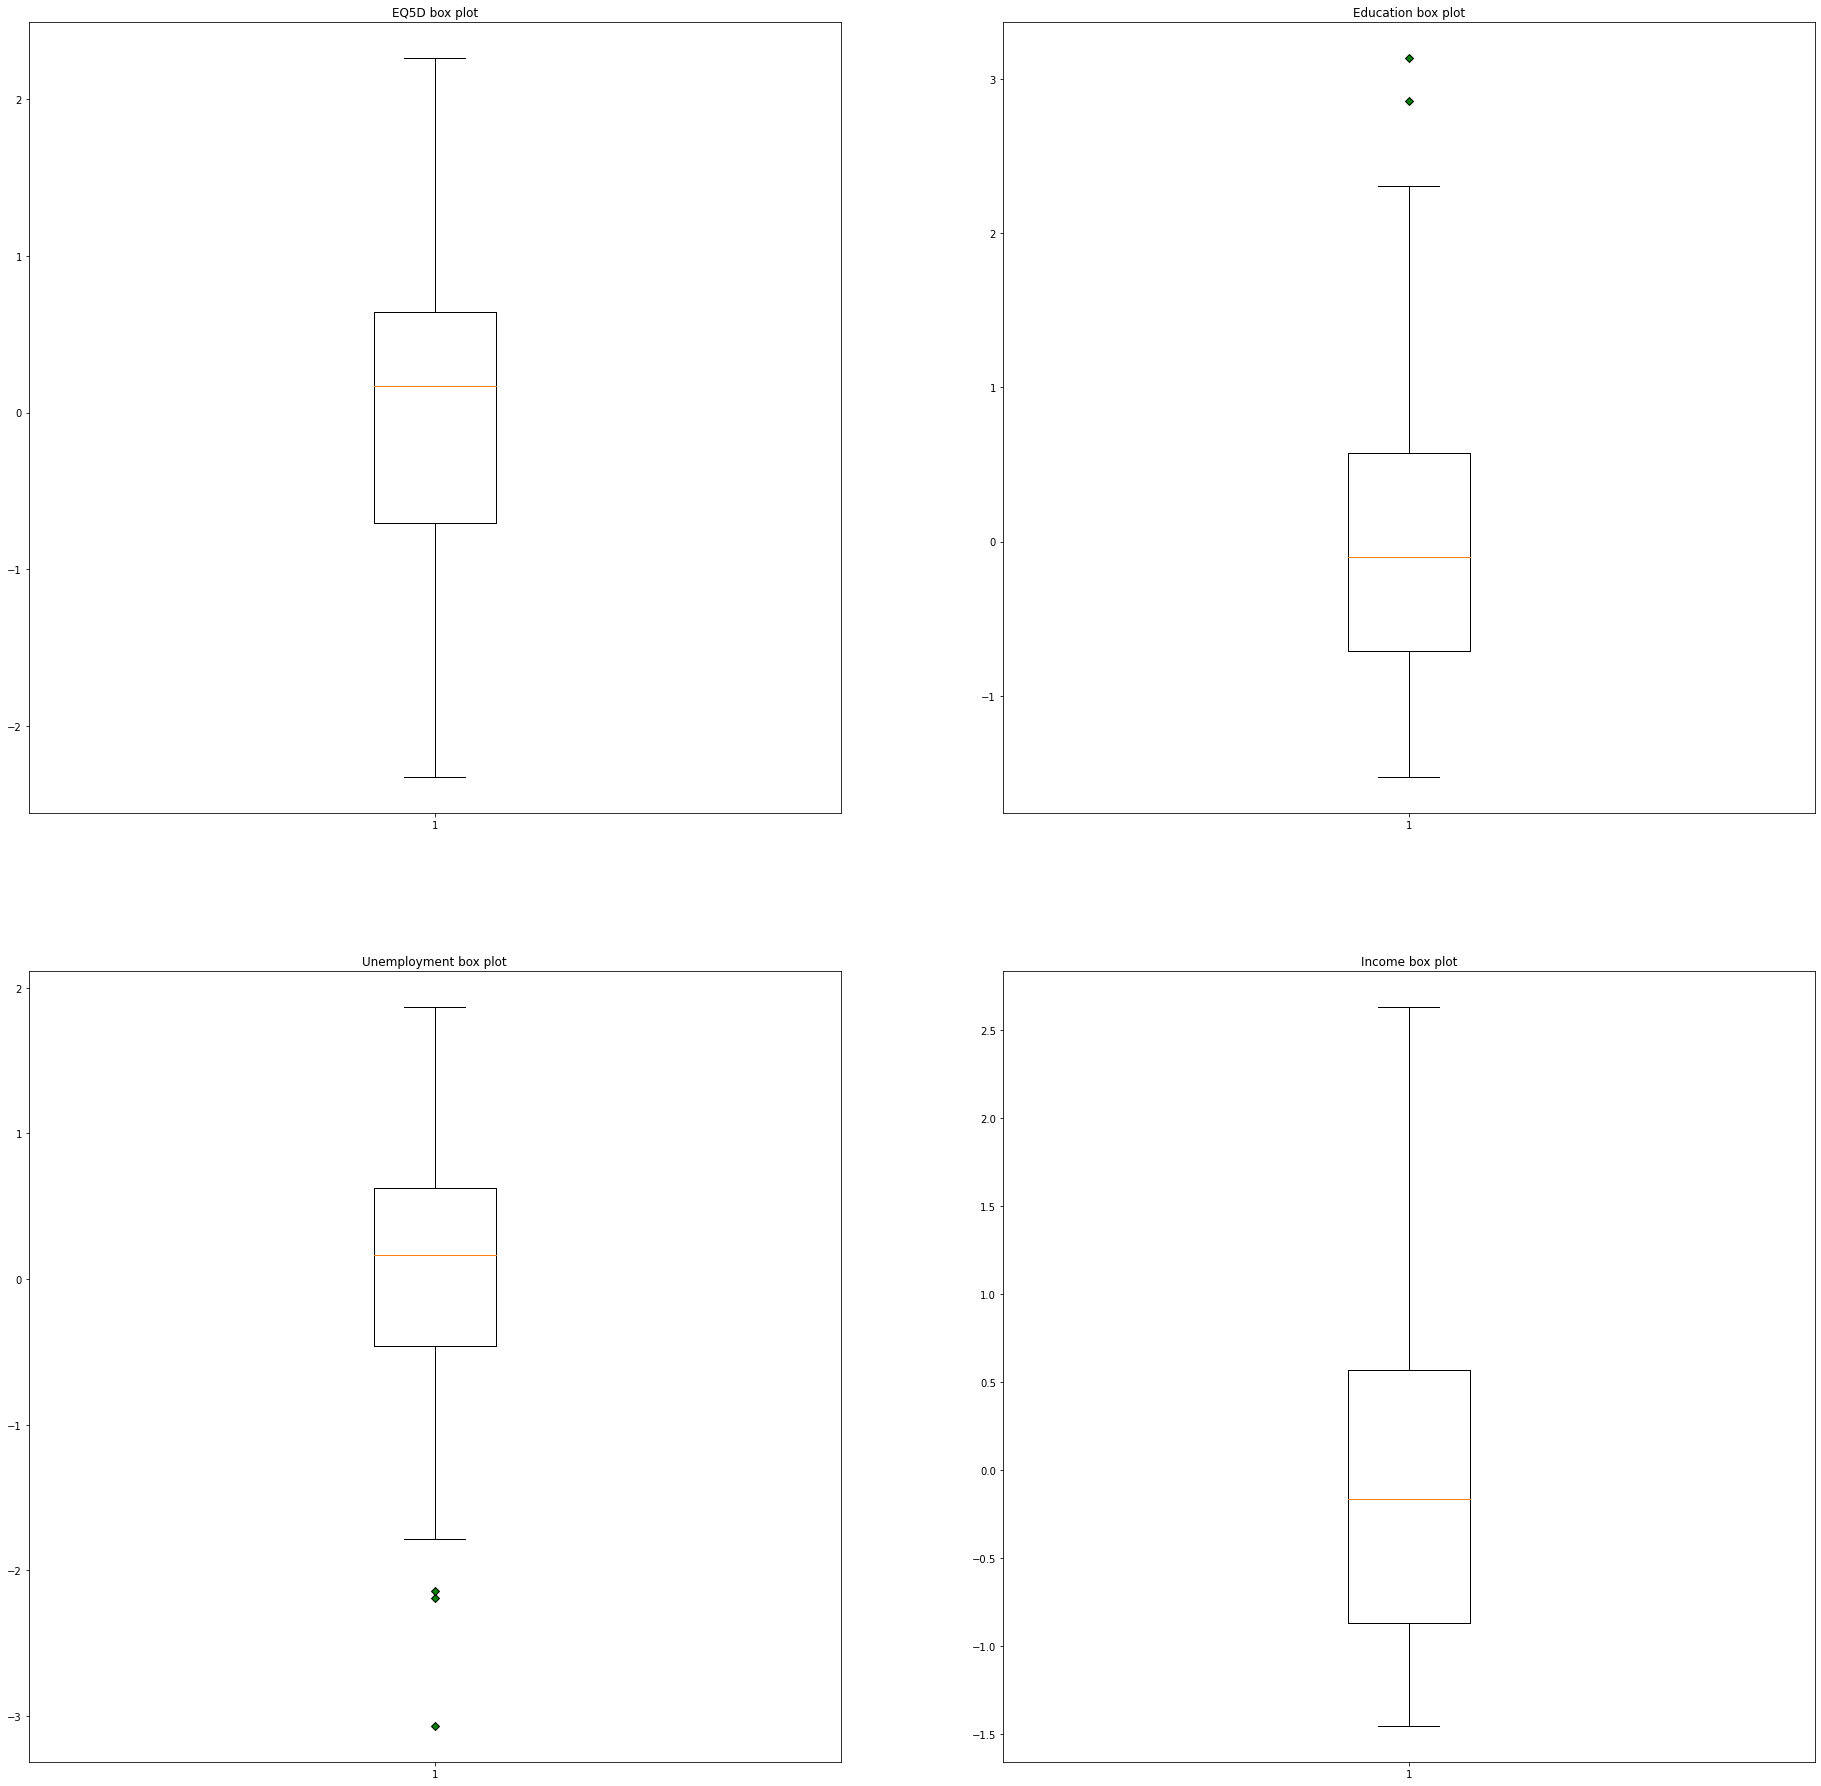

In [16]:
# 스케일링 후 시각화

plt.figure(figsize=(32,32))
green_diamond = dict(markerfacecolor='g', marker='D')

for k in range(4):
    
    plt.subplot(2,2,1+k)
    plt.boxplot(scale_df[scale_df.columns.tolist()[k]], flierprops=green_diamond)
    plt.title("{} box plot".format(scale_df.columns.tolist()[k]))
plt.show()

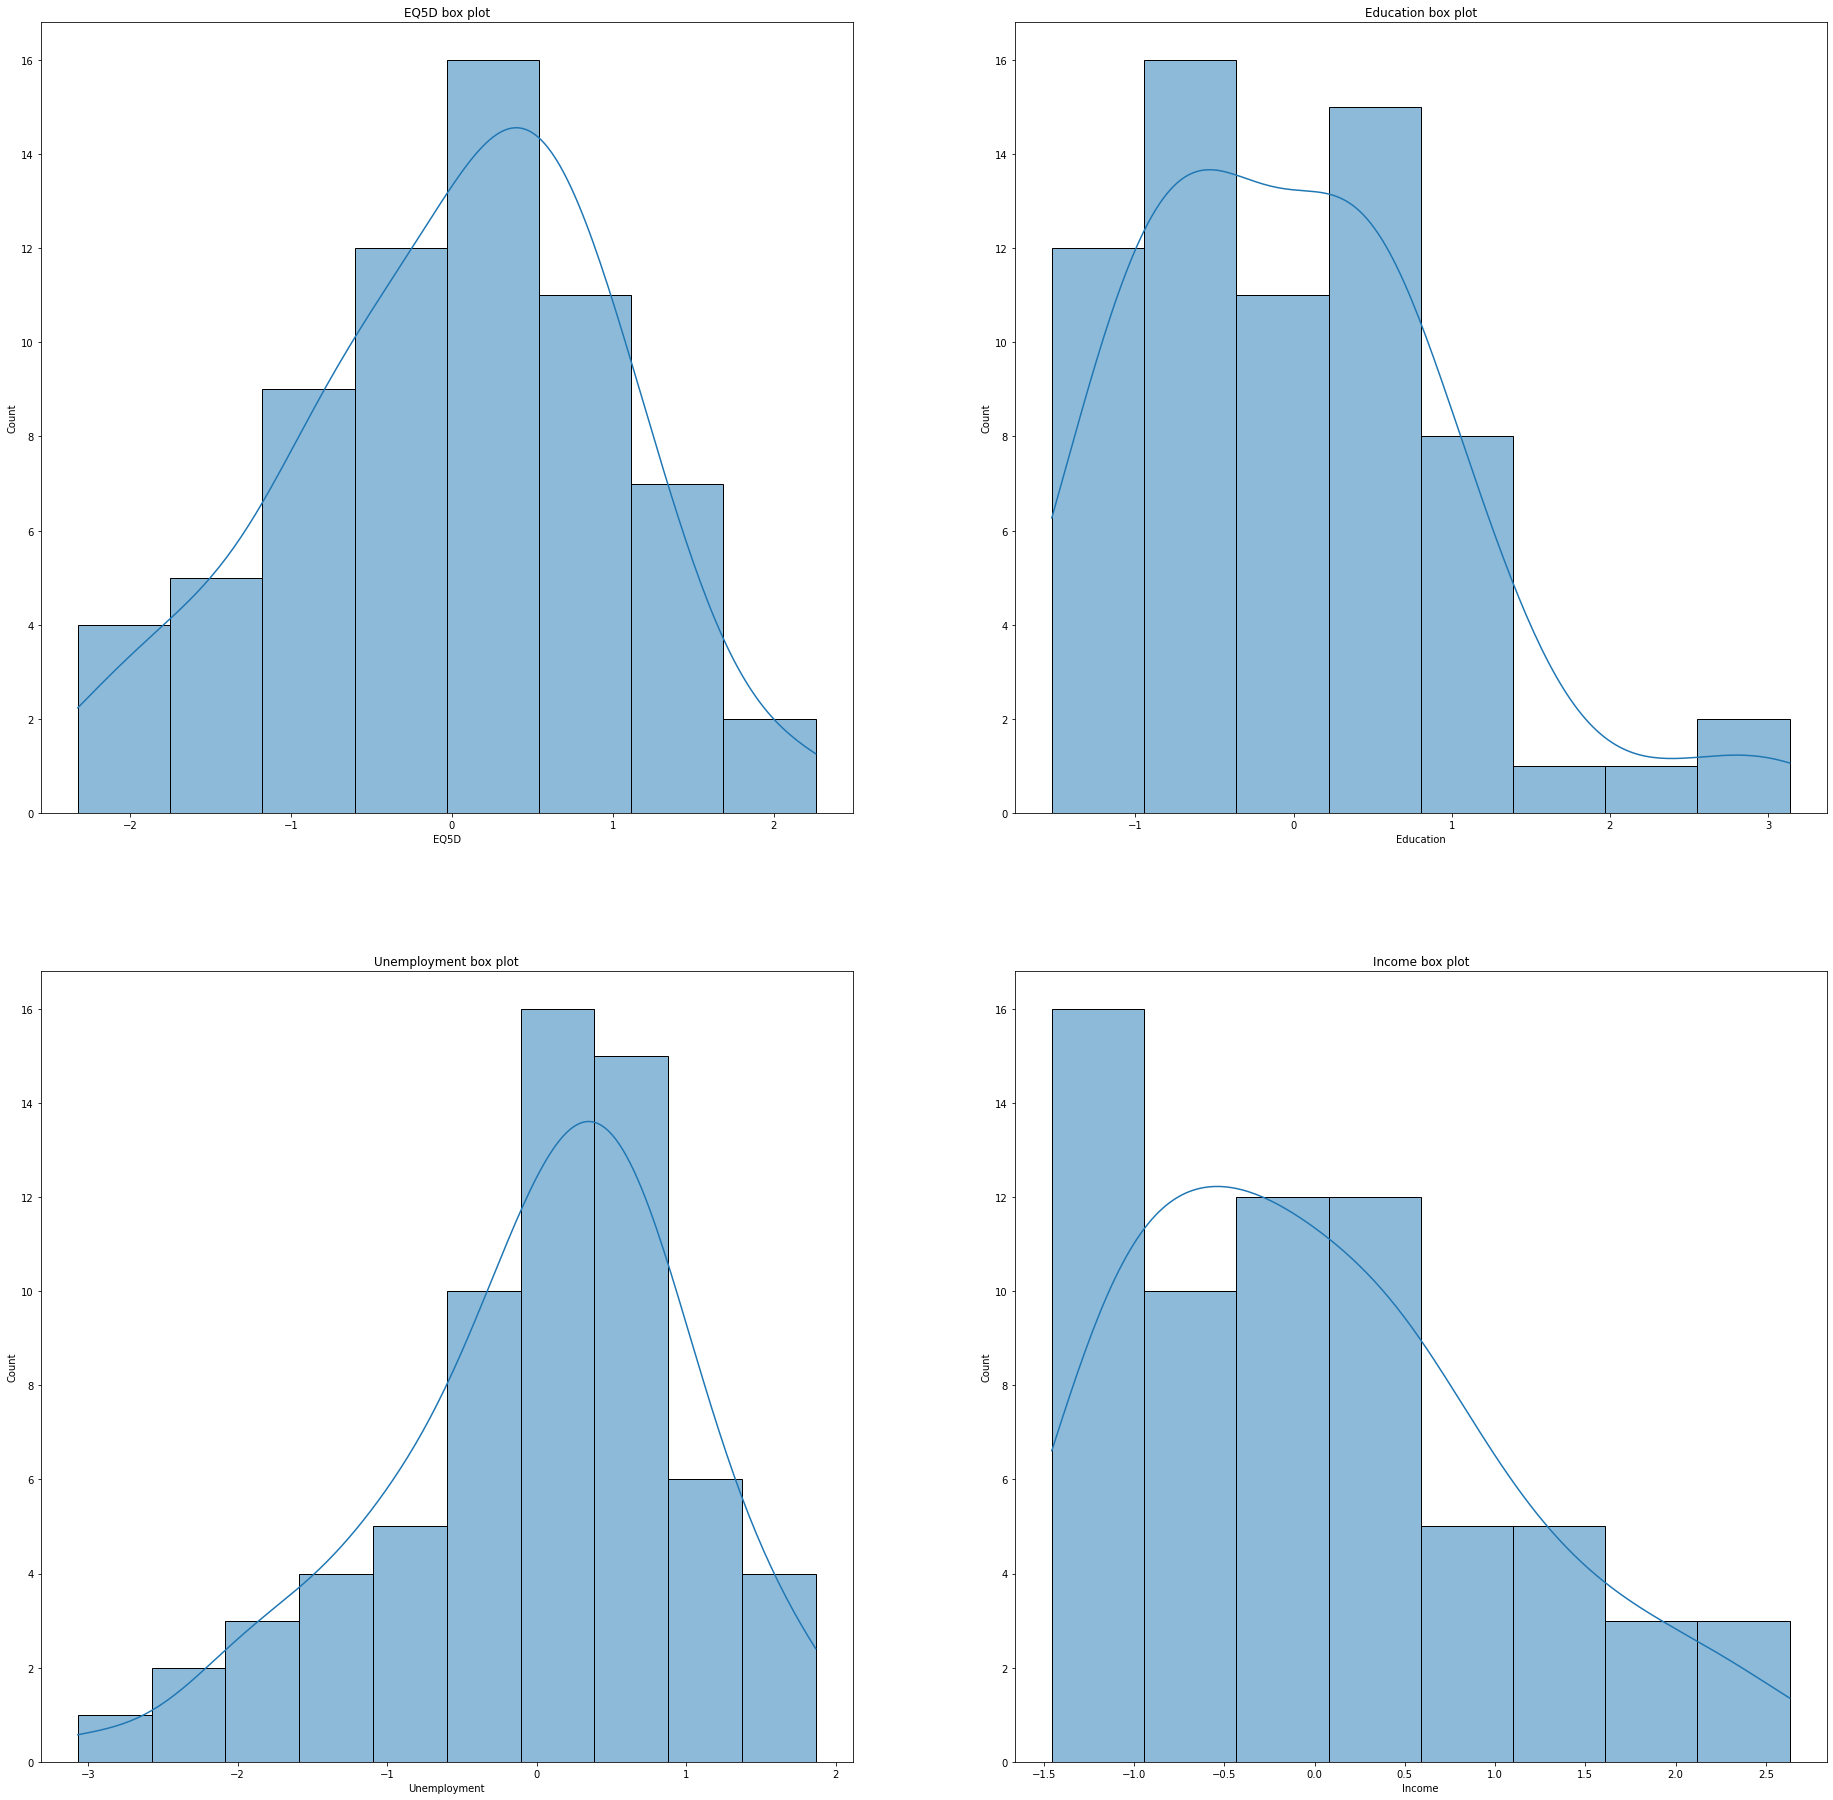

In [17]:
# 스케일링 후 시각화

plt.figure(figsize=(32,32))

for k in range(4):
    
    plt.subplot(2,2,1+k)
    sns.histplot(scale_df[scale_df.columns.tolist()[k]], kde=True)
    plt.title("{} box plot".format(scale_df.columns.tolist()[k]))
plt.show()

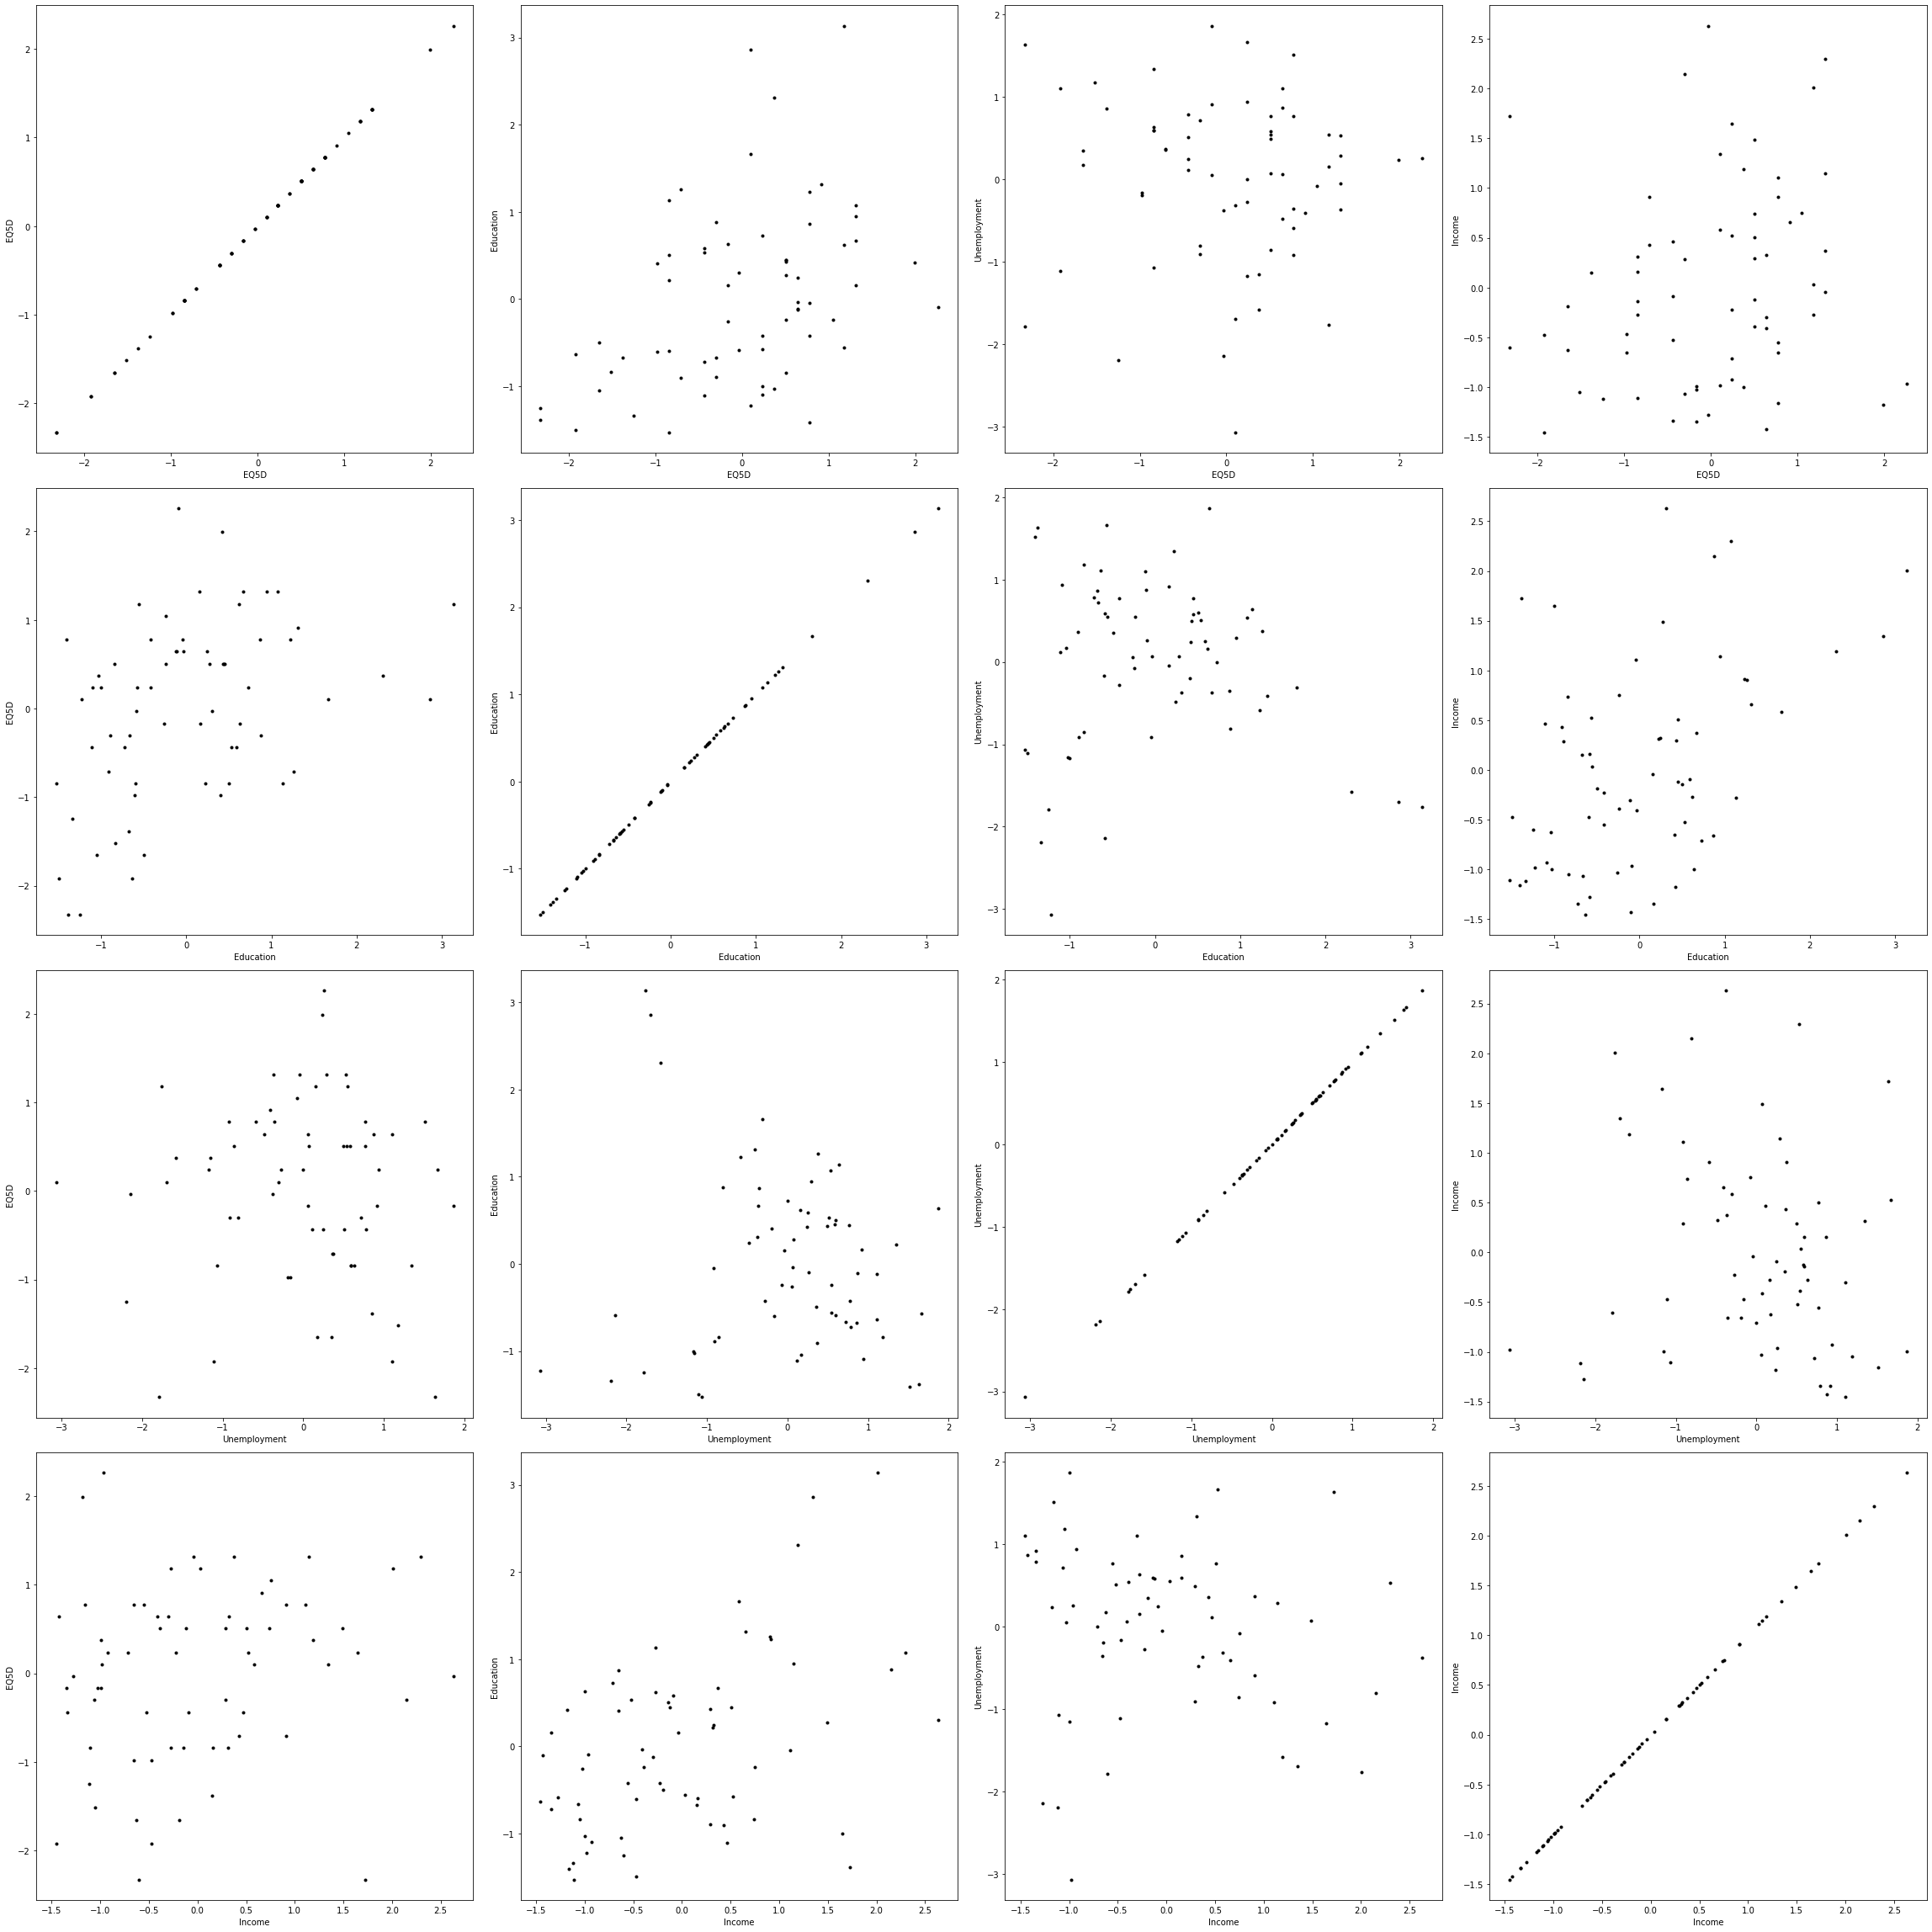

In [18]:
# 지표별끼리 SCTTER 찍고 시각화

plt.figure(figsize=(32,32))

column_num =len(scale_df.columns.tolist())

for i in range(len(scale_df.columns.tolist())):
    for j in range(column_num):
        plt.subplot(column_num,column_num,(i*column_num)+j+1)
        plt.scatter(scale_df[scale_df.columns.tolist()[i]],scale_df[scale_df.columns.tolist()[j]], color='black', marker='.')
        plt.xlabel(scale_df.columns.tolist()[i])
        plt.ylabel(scale_df.columns.tolist()[j])
        plt.tight_layout()

plt.show()

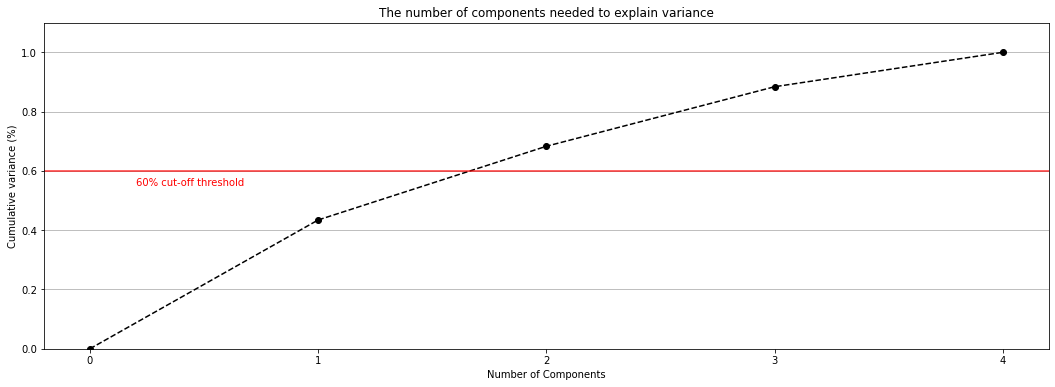

In [19]:
from sklearn.decomposition import PCA


pca = PCA().fit(scale_df)

plt.rcParams["figure.figsize"] = (18,6)

fig, ax = plt.subplots()

y = np.cumsum(pca.explained_variance_ratio_)
xi = np.arange(0, len(y)+1, step=1)

y = np.append([0], y)

plt.grid()
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='black')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, len(y), step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.60, color='red', linestyle='-', alpha=0.8)
plt.text(0.2, 0.55, '60% cut-off threshold', color = 'red', fontsize=10)

ax.grid(axis='x')
plt.show()


In [20]:
#pca 실행
from sklearn.decomposition import PCA
pca = PCA(n_components=1) # 주성분을 몇개로 할지 결정
 
x = scale_df #스케일링 scale_df

printcipalComponents = pca.fit_transform(x)

# 주성분으로 이루어진 데이터 프레임 구성
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['component1'])
principalDf

,component1
0,1.77229
1,1.70883
2,1.79467
3,1.35921
4,-0.27409
...,...
61,-1.91631
62,-1.87683
63,-1.76326
64,-0.76533


In [21]:
# 주성분의 반영 비율
print(pca.explained_variance_ratio_)
sum(pca.explained_variance_ratio_)

[0.43444769]


0.4344476858287709

In [22]:
scale_df.join(principalDf).corr()

,EQ5D,Education,Unemployment,Income,component1
EQ5D,1.00000,0.40955,-0.04112,0.16693,0.64758
Education,0.40955,1.00000,-0.09385,0.45405,0.84218
Unemployment,-0.04112,-0.09385,1.00000,-0.15057,-0.29102
Income,0.16693,0.45405,-0.15057,1.00000,0.72421
component1,0.64758,0.84218,-0.29102,0.72421,1.00000


In [23]:
# kernel pca 실행

from sklearn.decomposition import KernelPCA
Kpca = KernelPCA(n_components=1,kernel='sigmoid') # 주성분을 몇개로 할지 결정
x = scale_df 
KPComponents = Kpca.fit_transform(x)

# kernel pca 실행 후, 주성분으로 이루어진 데이터 프레임 구성
KPdf = pd.DataFrame(data=KPComponents, columns = ['Kpca_component1'])
KPdf

,Kpca_component1
0,0.49424
1,0.50166
2,0.57106
3,0.49166
4,-0.07348
...,...
61,-0.63220
62,-0.56622
63,-0.61259
64,-0.21434


In [24]:
scale_df.join(KPdf).corr()

,EQ5D,Education,Unemployment,Income,Kpca_component1
EQ5D,1.00000,0.40955,-0.04112,0.16693,0.68654
Education,0.40955,1.00000,-0.09385,0.45405,0.80864
Unemployment,-0.04112,-0.09385,1.00000,-0.15057,-0.32343
Income,0.16693,0.45405,-0.15057,1.00000,0.69374
Kpca_component1,0.68654,0.80864,-0.32343,0.69374,1.00000


In [25]:
explained_variance = np.var(KPComponents, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
explained_variance_ratio

array([1.])

### 4년치 데이터 PCA

In [26]:
df = pd.DataFrame()

df

""


In [28]:
# 원데이터 가져오기

indicators_orgin= pd.read_excel('../data/statics/지표.xlsx')

indicators_orgin

,시도,시군구,행정구역코드,년도,EQ5D,학사_비율,소득액,실업급여지급자수(년),실업급여지급건수(년),실업급여지급액(년),...,70-74세,75-79세,80-84세,85-89세,90-94세,95-99세,100세이상,경제활동가능인구,인구_실업급여자_비율,경제활동가능인구_실업급여자_비율
0,서울,종로구,11010,2015,0.95000,0.38831,2755607,3443,13435,11931891080,...,6511.50000,4647.00000,2593.50000,1264.50000,481.50000,115.00000,18.50000,112432.00000,0.02132,0.03062
1,서울,종로구,11010,2016,0.96800,0.38831,2737610,3304,12419,11836795910,...,6336.50000,4833.50000,2809.50000,1309.50000,482.50000,127.50000,20.50000,110602.50000,0.02140,0.02987
2,서울,종로구,11010,2017,0.95700,0.38831,2870292,3214,12277,12480610630,...,6187.50000,5251.50000,3027.00000,1401.00000,501.50000,132.00000,24.50000,110189.00000,0.02044,0.02917
3,서울,종로구,11010,2018,0.95200,0.38831,3007628,3265,12960,14710609140,...,6152.00000,5571.50000,3234.00000,1493.50000,546.50000,142.00000,24.50000,109943.50000,0.02067,0.02970
4,서울,중구,11020,2015,0.95200,0.32739,2922120,3034,11835,10491851900,...,5269.00000,3661.00000,2056.00000,1019.50000,364.50000,78.50000,8.00000,92054.00000,0.02361,0.03296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,경기,가평군,31370,2018,0.97000,0.18539,1893631,1270,4938,5586589860,...,3516.00000,3268.00000,2121.00000,1003.50000,337.00000,86.50000,9.50000,41697.50000,0.02118,0.03046
260,경기,양평군,31380,2015,0.95200,0.23208,1571897,1671,6827,6165924380,...,5970.50000,4684.50000,2791.00000,1299.00000,494.00000,114.50000,13.50000,71373.00000,0.01639,0.02341
261,경기,양평군,31380,2016,0.95000,0.23208,1637534,1720,6935,6728977860,...,6135.50000,4844.50000,3119.00000,1427.00000,516.00000,132.50000,12.50000,73185.50000,0.01627,0.02350
262,경기,양평군,31380,2017,0.95300,0.23208,1708265,1833,7505,7765318000,...,6290.00000,5194.00000,3404.50000,1553.00000,540.00000,143.50000,14.00000,74997.50000,0.01676,0.02444


In [29]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

for year in range(2015,2019):
    # 년도, 지표 선택
    print(year)
    
    indicators = indicators_orgin[indicators_orgin['년도']==year].reset_index().drop(columns=['index'])
    indicators = indicators[['EQ5D','학사_비율','소득액']]

    indicators.columns = ['EQ5D','Education', 'Income']

    #전체적으로 스케일링을 하여 같은 범위로 하게 만듦


    transformer = StandardScaler()

    x_data = transformer.fit_transform(indicators)

    scale_df= pd.DataFrame(x_data,columns=indicators.columns.tolist())
    
    #pca 실행
    pca = PCA(n_components=1) # 주성분을 몇개로 할지 결정

    x = scale_df #스케일링 scale_df

    printcipalComponents = pca.fit_transform(x)

    # 주성분으로 이루어진 데이터 프레임 구성
    principalDf = pd.DataFrame(data=printcipalComponents, columns = ['사회적_불평등_지수'])
    # 주성분의 반영 비율
    print(pca.explained_variance_ratio_)
    
    df = df.append(indicators.join(principalDf))
    
df = df.reset_index().drop(columns=['index'])    

2015
[0.56676546]
2016
[0.57268741]
2017
[0.51489186]
2018
[0.55076059]


In [30]:
df

,EQ5D,Education,Income,사회적_불평등_지수
0,0.95000,0.38831,2755607,1.60285
1,0.95200,0.32739,2922120,1.63046
2,0.95800,0.42527,2327359,1.70696
3,0.96200,0.36584,2141397,1.32252
4,0.94900,0.35151,1832328,-0.16206
...,...,...,...,...
259,0.95600,0.13530,2115007,-1.31469
260,0.94000,0.16190,2056349,-2.15956
261,0.96600,0.13197,1872702,-1.16425
262,0.97000,0.18539,1893631,-0.59525


In [31]:
indicators_orgin[['시도', '시군구','년도','행정구역코드']].join(df[['사회적_불평등_지수']])

,시도,시군구,년도,행정구역코드,사회적_불평등_지수
0,서울,종로구,2015,11010,1.60285
1,서울,종로구,2016,11010,1.63046
2,서울,종로구,2017,11010,1.70696
3,서울,종로구,2018,11010,1.32252
4,서울,중구,2015,11020,-0.16206
...,...,...,...,...,...
259,경기,가평군,2018,31370,-1.31469
260,경기,양평군,2015,31380,-2.15956
261,경기,양평군,2016,31380,-1.16425
262,경기,양평군,2017,31380,-0.59525


In [32]:
indicators_orgin[['시도', '시군구','년도','행정구역코드']].join(df[['사회적_불평등_지수']]).to_excel('../data/temporary_storage/1_soc_index.xlsx', index=False)